In [ ]:
pwd

In [1]:
import pandas as pd

In [2]:
maternal_dataset = pd.read_csv("Maternal Health Risk Data Set.csv")

In [3]:
maternal_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
maternal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [71]:
# Map the RiskLevel to numerical values
risk_mapping = {'Low': 0, 'Mid': 1, 'High': 2}
maternal_dataset['RiskLevel'] = maternal_dataset['RiskLevel'].map(risk_mapping)

# Check the result
print(maternal_dataset['RiskLevel'].value_counts())


Series([], Name: count, dtype: int64)


In [72]:
import pandas as pd

maternal_dataset = pd.read_csv("Maternal Health Risk Data Set.csv")
maternal_dataset['RiskLevel'] = maternal_dataset['RiskLevel'].astype(str).str.strip().str.lower()
print(maternal_dataset['RiskLevel'].unique())


['high risk' 'low risk' 'mid risk']


In [73]:
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
maternal_dataset['RiskLevel'] = maternal_dataset['RiskLevel'].map(risk_mapping)

In [74]:
print(maternal_dataset['RiskLevel'].value_counts())

RiskLevel
0    406
1    336
2    272
Name: count, dtype: int64


In [75]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [76]:
# Separate features (X) and target (y)
X = maternal_dataset.drop('RiskLevel', axis=1)  # All columns except the target
y = maternal_dataset['RiskLevel']   

In [11]:

# Split the dataset and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Fit & transform training features
X_test_scaled = scaler.transform(X_test) # Only transform test features

In [13]:
print(X_train_scaled[:5])  # the first 5 rows of the scaled training data

[[ 0.01586892  0.3596051   0.26018219  0.06867785  1.65272892  0.19541766]
 [-0.50789785  0.90037968 -0.46517963 -0.56360093 -0.50034961 -0.5310165 ]
 [ 0.16551657  0.3596051   0.98554401 -0.56360093 -0.50034961 -0.5310165 ]
 [ 0.09069275  0.3596051  -1.19054145 -0.80446904 -0.50034961  0.19541766]
 [ 0.38998805 -0.72194407 -1.19054145  1.87518866 -0.50034961  0.67970709]]


In [14]:
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (811, 6) (811,)
Test set: (203, 6) (203,)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
# Initialize the model
log_reg = LogisticRegression(max_iter=5000)

In [17]:
# Train the model
log_reg.fit(X_train, y_train)
print("Logistic Regression model trained!")

Logistic Regression model trained!


In [18]:
# Make predictions
y_pred_logreg = log_reg.predict(X_test)

In [19]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Accuracy: 0.6502463054187192
Confusion Matrix:
 [[71  5  4]
 [42 21 13]
 [ 2  5 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.89      0.73        80
           1       0.68      0.28      0.39        76
           2       0.70      0.85      0.77        47

    accuracy                           0.65       203
   macro avg       0.67      0.67      0.63       203
weighted avg       0.66      0.65      0.61       203



In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [21]:
# Predict on test data
y_pred_logreg = log_reg.predict(X_test)

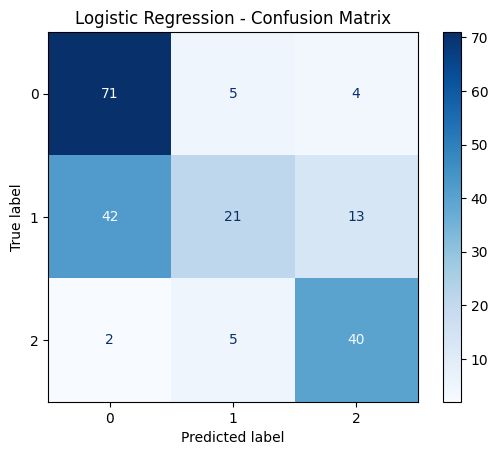

In [22]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

In [23]:
import numpy as np

In [24]:
feature_names = X.columns  # make sure X is a DataFrame
coefficients = log_reg.coef_

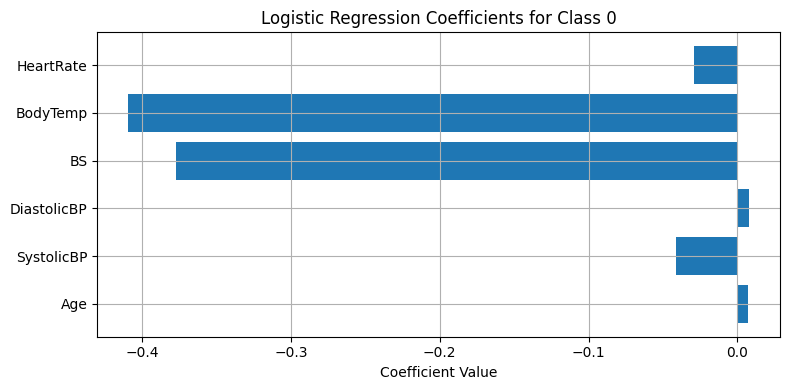

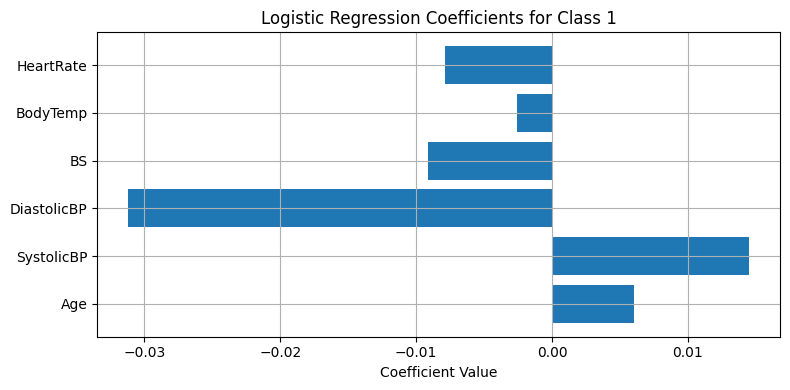

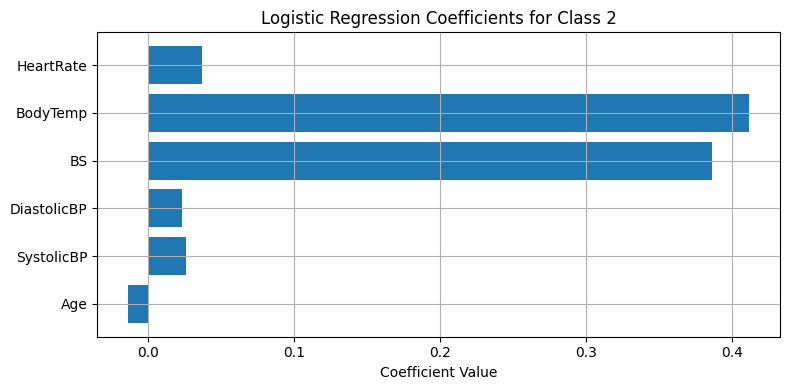

In [25]:
# Plot each class's coefficients
for i in range(coefficients.shape[0]):
    plt.figure(figsize=(8, 4))
    plt.barh(feature_names, coefficients[i])
    plt.title(f'Logistic Regression Coefficients for Class {i}')
    plt.xlabel('Coefficient Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

In [28]:
# Fit the model to the training data
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [29]:
# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

In [30]:
# Evaluate the performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

In [31]:
# Display results
print("Decision Tree Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", confusion_dt)
print("Classification Report:\n", report_dt)

Decision Tree Accuracy: 0.8177339901477833
Confusion Matrix:
 [[62 13  5]
 [ 9 64  3]
 [ 1  6 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        80
           1       0.77      0.84      0.81        76
           2       0.83      0.85      0.84        47

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203



In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

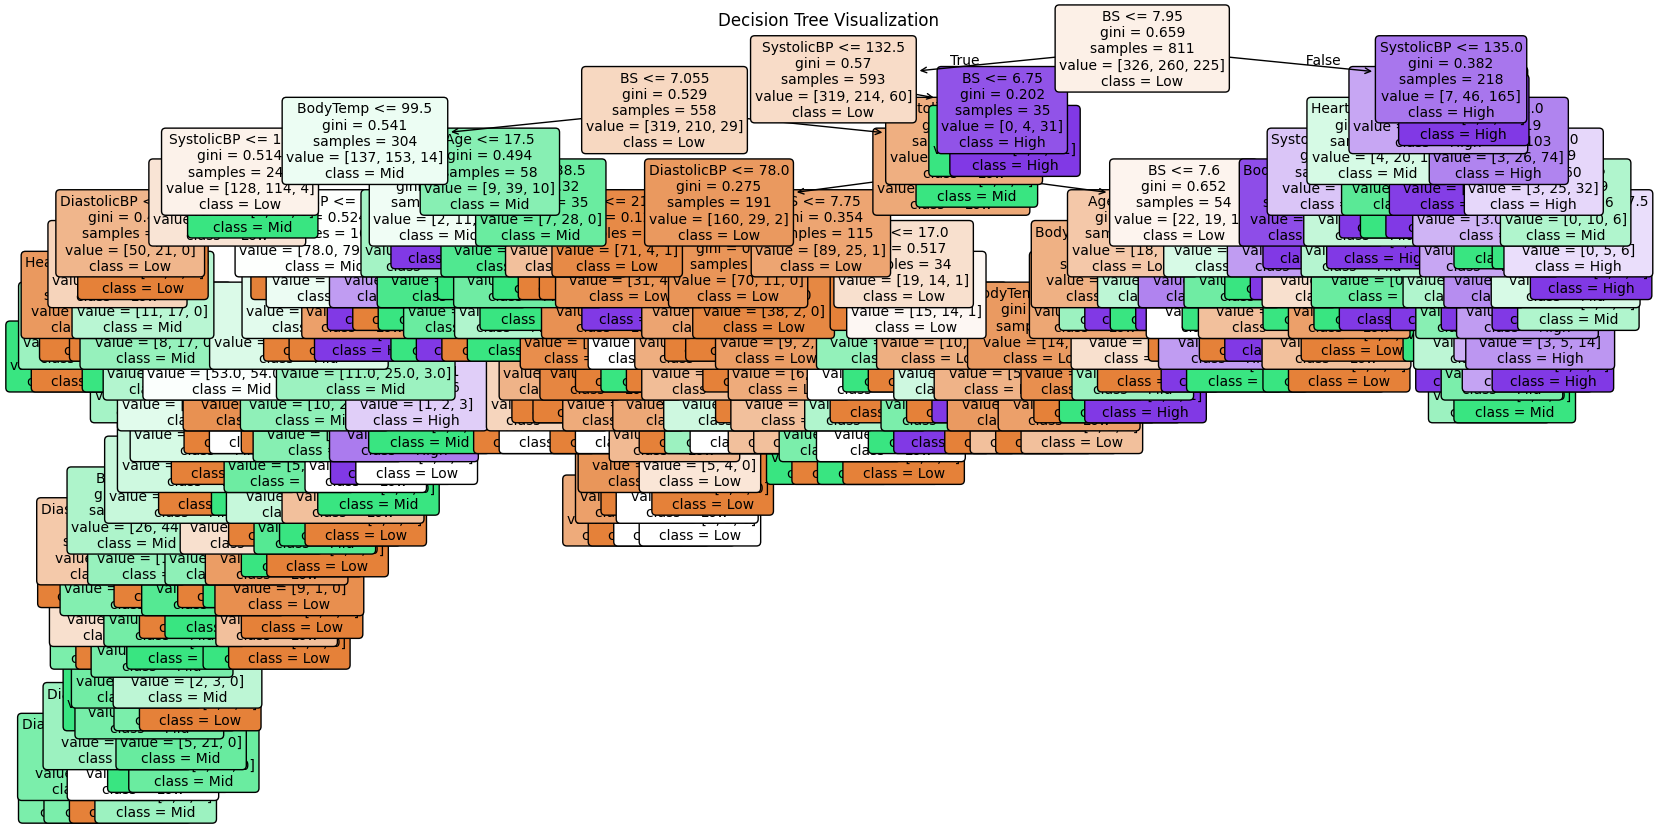

In [33]:
plt.figure(figsize=(20, 10))  # Adjust size as needed
plot_tree(dt_model, feature_names=X.columns, class_names=["Low", "Mid", "High"],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [36]:
# Fit the model on training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred_rf = rf_model.predict(X_test)

In [38]:
# Evaluate the performance and display 
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.812807881773399
Confusion Matrix:
 [[61 16  3]
 [ 9 64  3]
 [ 1  6 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81        80
           1       0.74      0.84      0.79        76
           2       0.87      0.85      0.86        47

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

In [41]:
# Create a DataFrame for better plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


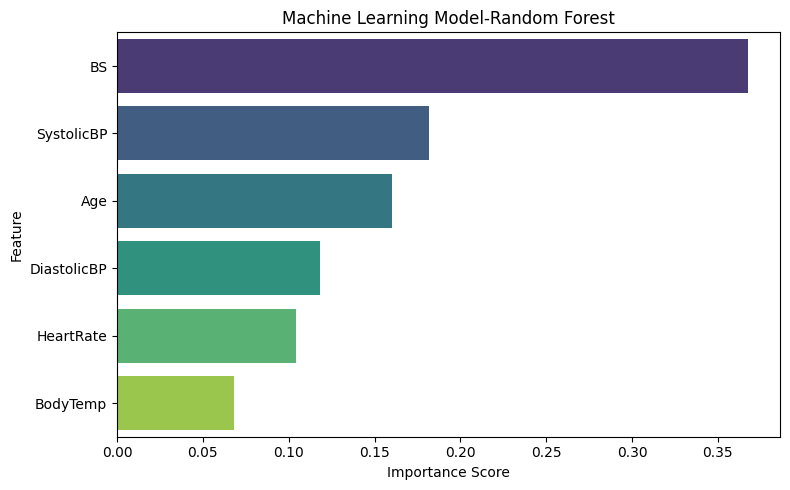

In [42]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    hue='Feature',  # Assign hue
    palette='viridis',
    dodge=False,    # Avoid shifting bars
    legend=False    # Turn off legend since hue is same as y
)
plt.title('Machine Learning Model-Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [43]:
!pip install xgboost

In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
# Create and train the model
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [46]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [47]:
# Evaluate and display report
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8423645320197044
Confusion Matrix:
 [[66 10  4]
 [ 9 64  3]
 [ 1  5 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85        80
           1       0.81      0.84      0.83        76
           2       0.85      0.87      0.86        47

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203



In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [49]:
# Get feature importances from the trained model
importances = xgb_model.feature_importances_
features = X_train.columns

In [50]:
# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

/var/folders/qb/84fs_qkx44bd4d2zn8pk40000000gn/T/ipykernel_1584/317044911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


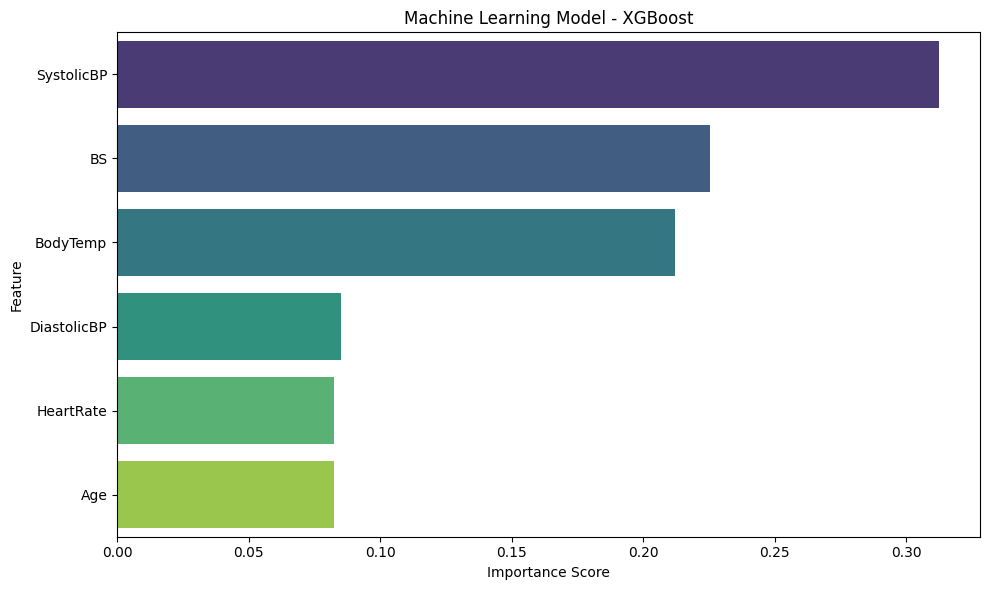

In [51]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Machine Learning Model - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

In [54]:
# Train the model
svm_model.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [55]:
# Make predictions
y_pred_svm = svm_model.predict(X_test)

In [56]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.5960591133004927
Confusion Matrix:
 [[74  5  1]
 [55 19  2]
 [12  7 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.93      0.67        80
           1       0.61      0.25      0.36        76
           2       0.90      0.60      0.72        47

    accuracy                           0.60       203
   macro avg       0.68      0.59      0.58       203
weighted avg       0.65      0.60      0.56       203



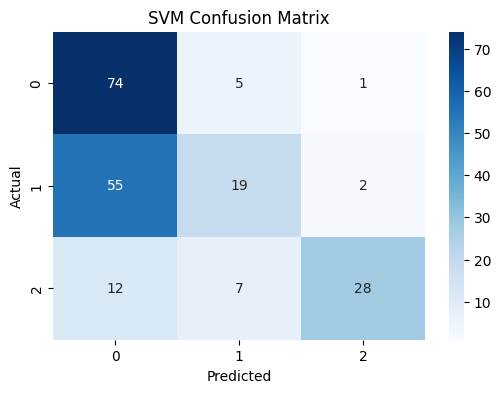

In [57]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [58]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
# Fit PCA for 2D visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [60]:
# Train SVM model on 2D PCA data
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train_pca, y_train)


SVC(C=1, kernel='linear', random_state=42)

In [61]:
# Plot decision boundaries
def plot_svm_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='deep', edgecolor='k')
    plt.title("SVM Decision Boundary (PCA 2D Projection)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Risk Level")
    plt.show()

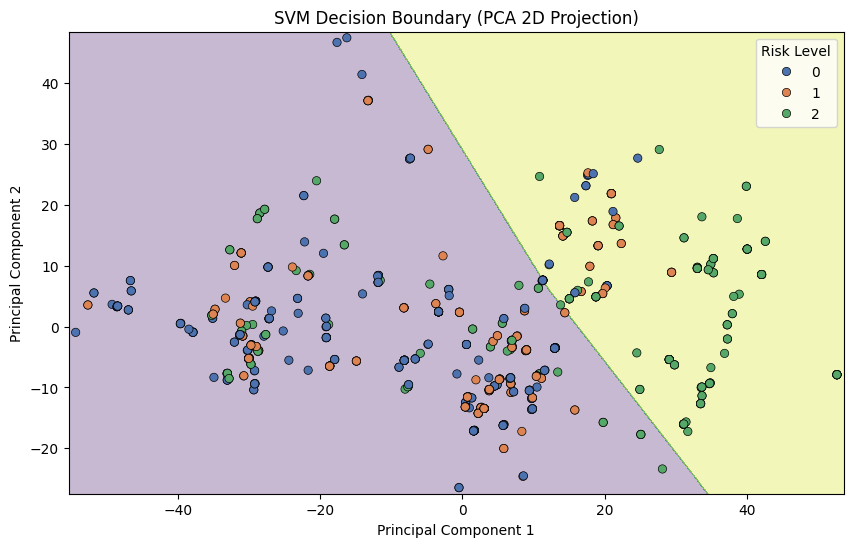

In [62]:
# Visualize
plot_svm_decision_boundary(svm_model, X_train_pca, y_train)

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
# Model performance data
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM'],
    'Accuracy': [0.67, 0.82, 0.81, 0.86, 0.58],
    'Precision': [0.67, 0.82, 0.82, 0.87, 0.63],
    'Recall': [0.67, 0.82, 0.82, 0.86, 0.58],
    'F1-Score': [0.64, 0.82, 0.81, 0.86, 0.57]
}
df = pd.DataFrame(data)

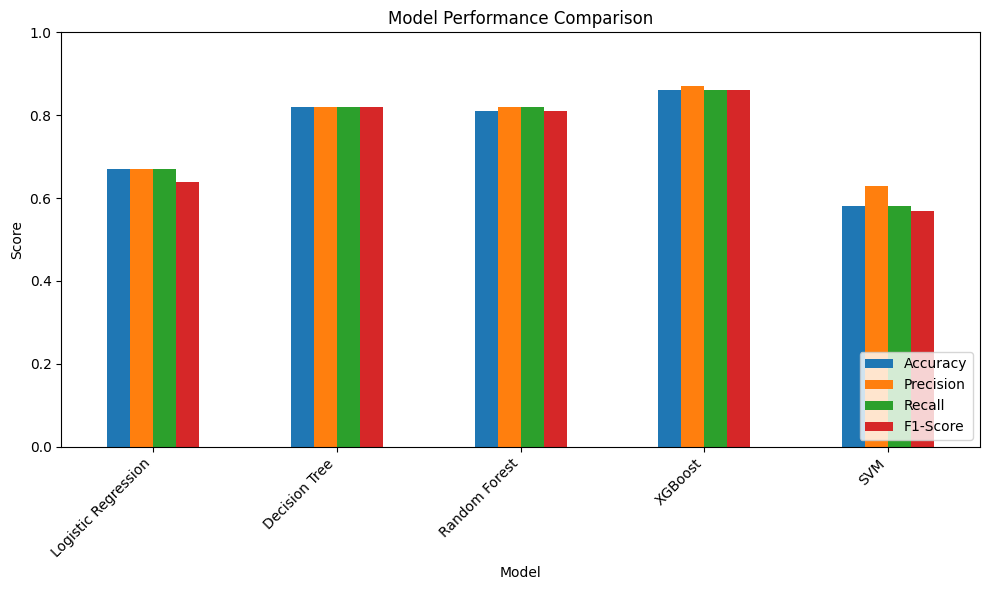

In [65]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df.set_index('Model').plot(kind='bar', ax=ax)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

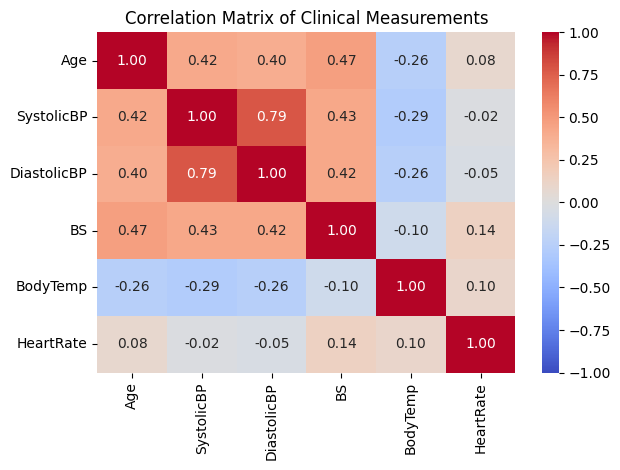

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Maternal Health Risk Data Set.csv")

# Create DataFrame
df = pd.DataFrame(data)

# Select only the clinical measurements (exclude RiskLevel)
clinical_vars = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
df_clinical = df[clinical_vars]

# Compute correlation matrix
correlation_matrix = df_clinical.corr()

#print(correlation_matrix)

# Visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Clinical Measurements')
plt.tight_layout()  # Prevent label cutoff
plt.show()

In [66]:
!pip install pydotplus

In [67]:
!pip install graphviz

In [68]:
import pandas as pd
import numpy as np
from pathlib import Path
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt
import graphviz

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
# 1. Load and preprocess data
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Feature engineering
df['BP_Category'] = pd.cut(df['SystolicBP'], 
                          bins=[0, 90, 120, 140, 200],
                          labels=['Low', 'Normal', 'Pre-High', 'High'])

# Convert to numerical
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df['RiskLevel_encoded'] = df['RiskLevel'].map(risk_mapping)

# 2. Define features
numerical_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
categorical_features = ['BP_Category']

# 3. Create preprocessing pipeline with proper encoding
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)  # Properly encode categories
])

# 4. Train and save both models
models = {
    'random_forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'xgboost': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(random_state=42, eval_metric='mlogloss'))
    ])
}

for name, model in models.items():
    model.fit(df[numerical_features + categorical_features], df['RiskLevel_encoded'])
    save_path = Path('deployment') / f'{name}_pipeline.pkl'
    joblib.dump(model, save_path)

# 5. Prediction function for both models
def predict_risk_level(age, systolic_bp, diastolic_bp, bs, body_temp, heart_rate, model_type='xgboost'):
    """Predict using either XGBoost (default) or Random Forest"""
    # Load the selected pipeline
    save_path = Path('deployment') / f'{model_type}_pipeline.pkl'
    pipeline = joblib.load(save_path)
    
    # Create input DataFrame (with BP category)
    input_df = pd.DataFrame([[age, systolic_bp, diastolic_bp, bs, body_temp, heart_rate]],
                          columns=numerical_features)
    
    # Add BP category (same logic as training)
    bp_val = systolic_bp
    if bp_val < 90: bp_cat = 'Low'
    elif bp_val < 120: bp_cat = 'Normal'
    elif bp_val < 140: bp_cat = 'Pre-High'
    else: bp_cat = 'High'
    input_df['BP_Category'] = bp_cat
    
    # Predict and return
    prediction = pipeline.predict(input_df)[0]
    return ['low risk', 'mid risk', 'high risk'][prediction]

# Example usage
print("XGBoost prediction:", predict_risk_level(35,120,60,6.1,98.0,76))  # XGBoost
print("RF prediction:", predict_risk_level(35,120,60,6.1,98.0,76, 'random_forest'))  # Random Forest

XGBoost prediction: low risk
RF prediction: mid risk


This is to test the deployment

In [ ]:
import requests

url = 'http://127.0.0.1:5000/predict-api'
data = {'Age': 25,'SystolicBP':130,'DiastolicBP':80,'BS':15,'BodyTemp':98.0,'HeartRate':86}  # example input
response = requests.post(url, json=data)
print(response.json())
